C:\Users\Maksym\AppData\Local\Temp/ipykernel_788/4006568176.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(desc1, desc2)]))


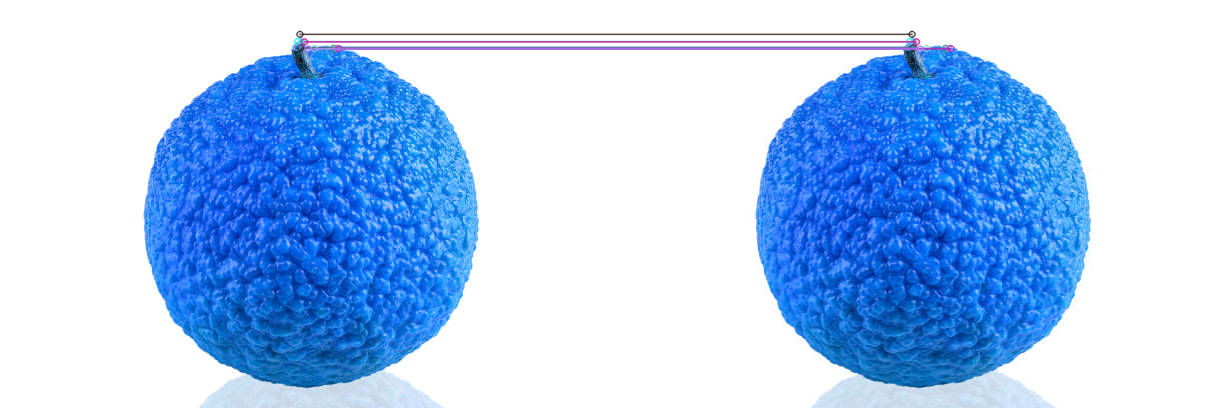

In [82]:
import math
import cv2
import numpy as np
from PIL import Image
img1 = cv2.imread("tank.jpg")
img2 = cv2.imread("tank.jpg")

brisk = cv2.BRISK_create()
keypoints1, descriptors1 = brisk.detectAndCompute(img1, None)
keypoints2, descriptors2 = brisk.detectAndCompute(img2, None)


def match(descriptors1, descriptors2, threshold=0.7):
    matches = []
    for i, desc1 in enumerate(descriptors1):
        min_dist = math.inf
        min_idx = -1
        for j, desc2 in enumerate(descriptors2):
            dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(desc1, desc2)]))
            if dist < min_dist:
                min_dist = dist
                min_idx = j
        if min_dist < threshold:
            matches.append(cv2.DMatch(i, min_idx, min_dist))
    return matches


matches = match(descriptors1, descriptors2)

img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)

Image.fromarray(img_matches.astype(np.uint8))


[[180 120 207 ... 207 239 239]
 [180 123 255 ... 207 255  31]
 [ 32 127 143 ... 127  55   0]
 ...
 [255 143 127 ...  73  25  42]
 [235 255 255 ... 237 157  26]
 [176 123 207 ... 255 171   2]]


C:\Users\Maksym\AppData\Local\Temp/ipykernel_788/4006568176.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(desc1, desc2)]))


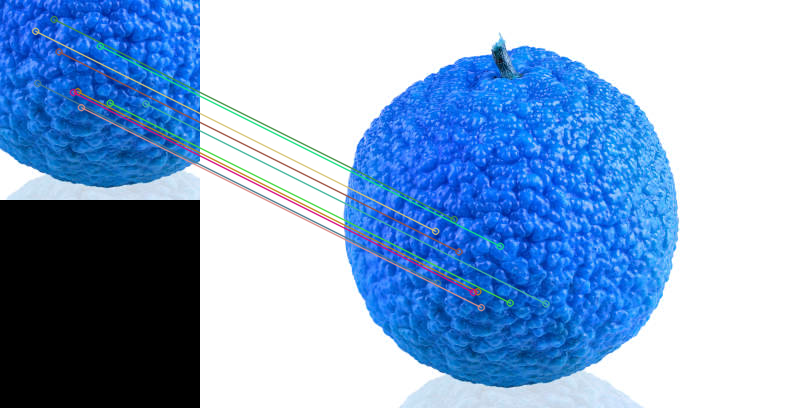

In [83]:
img1 = cv2.imread("tank.jpg")
img2 = cv2.imread("tank.jpg")

x, y, w, h = 200, 200, 200, 200
img1 = img1[y:y + h, x:x + w]
brisk = cv2.BRISK_create()
keypoints1, descriptors1 = brisk.detectAndCompute(img1, None)
keypoints2, descriptors2 = brisk.detectAndCompute(img2, None)

matches_crop = match(descriptors1, descriptors2)
img_matches_crop = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches_crop[:10], None, flags=2)
Image.fromarray(img_matches_crop.astype(np.uint8))

C:\Users\Maksym\AppData\Local\Temp/ipykernel_788/4006568176.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(desc1, desc2)]))


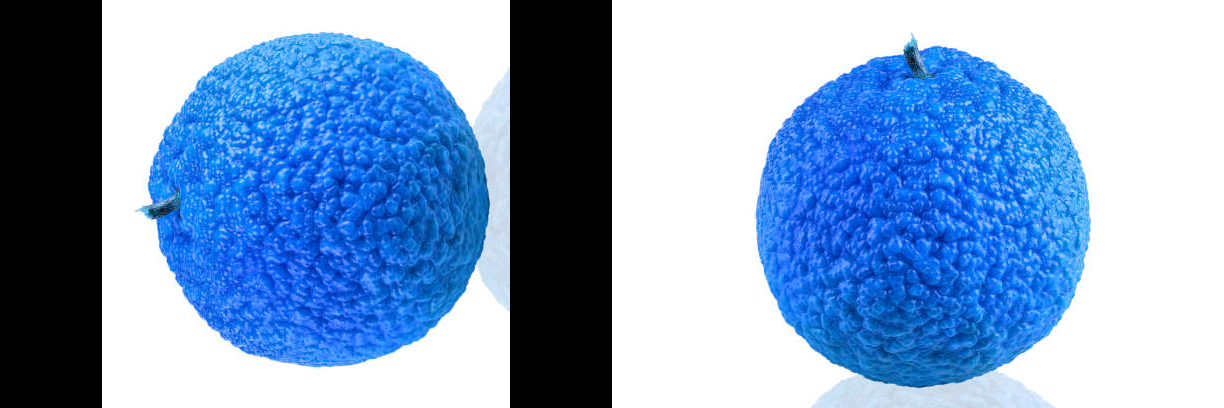

In [84]:
img1 = cv2.imread("tank.jpg")
img2 = cv2.imread("tank.jpg")
rows, cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
img1 = cv2.warpAffine(img1, M, (cols, rows))

brisk = cv2.BRISK_create()
keypoints1, descriptors1 = brisk.detectAndCompute(img1, None)
keypoints2, descriptors2 = brisk.detectAndCompute(img2, None)

matches = match(descriptors1, descriptors2)
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)
Image.fromarray(img_matches.astype(np.uint8))